In [18]:
from main import *
import matplotlib.pyplot as plt

Wczytanie danych:

In [19]:
df = pd.read_excel("data/example_data.xlsx")
event_list = load_event_list(df)
df

,event_id,city,start_date,end_date,visitors,ingredient_cost,parking_cost
0,0,Kraków,2022-07-04,2022-07-06,"10000,11000,9000",5.34,"300,200,100"
1,1,Warszawa,2022-07-05,2022-07-07,"12000,30000,25000",4.94,"300,200,100"
2,2,Gdynia,2022-07-06,2022-07-08,"8000,10000,13000",5.50,"300,200,100"
3,3,Szczecin,2022-07-07,2022-07-09,"9000,8000,7000",4.89,"300,200,100"
4,4,Poznań,2022-07-08,2022-07-10,"13000,12500,10000",5.40,"300,200,100"
5,5,Zakopane,2022-07-09,2022-07-11,"7000,9000,10000",5.12,"250,200,100"
6,6,Kraków,2022-07-10,2022-07-11,"12000,30000",5.05,"200,100"
7,7,Łódź,2022-07-11,2022-07-12,"15000,20000",4.92,"500,300"
8,8,Bydgoszcz,2022-07-15,2022-07-17,"10000,8000,12000",4.89,"300,250,200"
9,9,Toruń,2022-07-13,2022-07-14,"3000,7000",4.56,"300,200"


Wczytanie odległości między miastami:

In [20]:
# distances = driving_distances(list(df['city'].unique()))
with open('distances.json', 'r') as fp:
    distances = json.load(fp)

### Przykładowe wyniki działania algorytmu:

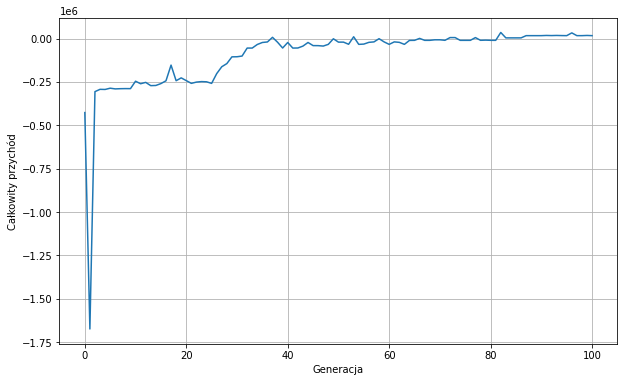

In [21]:
algorithm_settings = {
    'selection_method' : "tournament",
    'tournament_size' : 10,
    'crossover_methods' : ["one_point", "two_point"],
    'mutation_methods' : ["uniform", "swap", "event_change"],
    'population_size' : 100,
    'generations' : 100,
    'parents_percent' : 15,
    'mutation_size' : 0.15,
}

problem_settings = {
    'start_date': datetime(2022, 7, 4),
    'end_date': datetime(2022, 7, 15),
    'start_city': "Kraków",
    'product_price': 9.0,
    'max_capacity': 100000,
    'starting_ingredients': 500,
    'visitors_coeff': 0.2,
    'distance_coeff': 50 / 100000,
    'capacity_punishment_coeff': 18.0,
    'duration_punishment_coeff': 5000
}

best_solution, best_solutions_in_generations = genetic_algorithm(**algorithm_settings, **problem_settings)
plt.figure(figsize=(10, 6))
plt.plot(best_solutions_in_generations)
plt.grid()
plt.ylabel("Całkowity przychód")
plt.xlabel("Generacja")
plt.show()

In [22]:
print(f"Przychód z najlepszego rozwiązania: {best_solution.overall_profit()}")
print(f"\nNajlepsze rozwiązanie:")
for i, el in enumerate(best_solution.solution_list):
    print(f"{i + 1}. {el}")

Przychód z najlepszego rozwiązania: 34893.14185

Najlepsze rozwiązanie:
1. event_id = 16, city = Lubin, stay_duration = 1, ingredients_bought = 4410
2. event_id = 1, city = Warszawa, stay_duration = 1, ingredients_bought = 1808
3. event_id = 1, city = Warszawa, stay_duration = 1, ingredients_bought = 1808
4. event_id = 1, city = Warszawa, stay_duration = 1, ingredients_bought = 4410
5. event_id = 17, city = Suwałki, stay_duration = 2, ingredients_bought = 2353


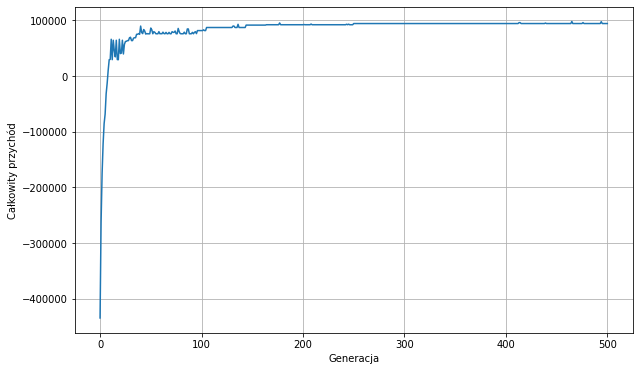

In [23]:
algorithm_settings = {
    'selection_method' : "tournament",
    'tournament_size' : 10,
    'crossover_methods' : ["one_point", "two_point"],
    'mutation_methods' : ["uniform", "swap", "event_change"],
    'population_size' : 200,
    'generations' : 500,
    'parents_percent' : 15,
    'mutation_size' : 0.15,
}

best_solution, best_solutions_in_generations = genetic_algorithm(**algorithm_settings, **problem_settings)
plt.figure(figsize=(10, 6))
plt.plot(best_solutions_in_generations)
plt.grid()
plt.ylabel("Całkowity przychód")
plt.xlabel("Generacja")
plt.show()

In [24]:
print(f"Przychód z najlepszego rozwiązania: {best_solution.overall_profit()}")
print(f"\nNajlepsze rozwiązanie:")
for i, el in enumerate(best_solution.solution_list):
    print(f"{i + 1}. {el}")

Przychód z najlepszego rozwiązania: 98043.61574999998

Najlepsze rozwiązanie:
1. event_id = 0, city = Kraków, stay_duration = 3, ingredients_bought = 9308
2. event_id = 12, city = Katowice, stay_duration = 4, ingredients_bought = 9237
3. event_id = 7, city = Łódź, stay_duration = 2, ingredients_bought = 4789
4. event_id = 20, city = Rzeszów, stay_duration = 1, ingredients_bought = 1155
5. event_id = 9, city = Toruń, stay_duration = 1, ingredients_bought = 513


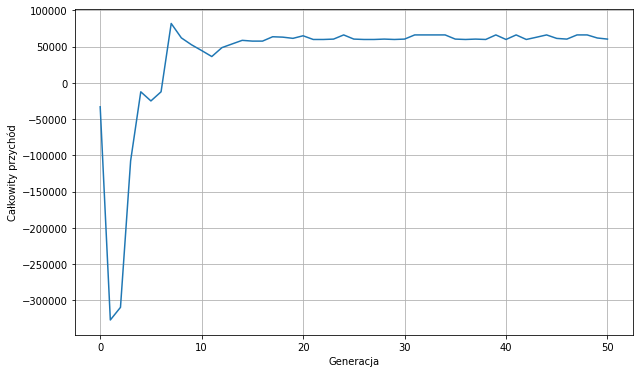

In [25]:
algorithm_settings = {
    'selection_method' : "tournament",
    'tournament_size' : 10,
    'crossover_methods' : ["one_point", "two_point"],
    'mutation_methods' : ["uniform", "swap", "event_change"],
    'population_size' : 1000,
    'generations' : 50,
    'parents_percent' : 20,
    'mutation_size' : 0.10,
}

best_solution, best_solutions_in_generations = genetic_algorithm(**algorithm_settings, **problem_settings)
plt.figure(figsize=(10, 6))
plt.plot(best_solutions_in_generations)
plt.grid()
plt.ylabel("Całkowity przychód")
plt.xlabel("Generacja")
plt.show()

In [26]:
print(f"Przychód z najlepszego rozwiązania: {best_solution.overall_profit()}")
print(f"\nNajlepsze rozwiązanie:")
for i, el in enumerate(best_solution.solution_list):
    print(f"{i + 1}. {el}")

Przychód z najlepszego rozwiązania: 81927.9978

Najlepsze rozwiązanie:
1. event_id = 1, city = Warszawa, stay_duration = 2, ingredients_bought = 10326
2. event_id = 1, city = Warszawa, stay_duration = 2, ingredients_bought = 10326
3. event_id = 17, city = Suwałki, stay_duration = 3, ingredients_bought = 13370
4. event_id = 7, city = Łódź, stay_duration = 2, ingredients_bought = 251


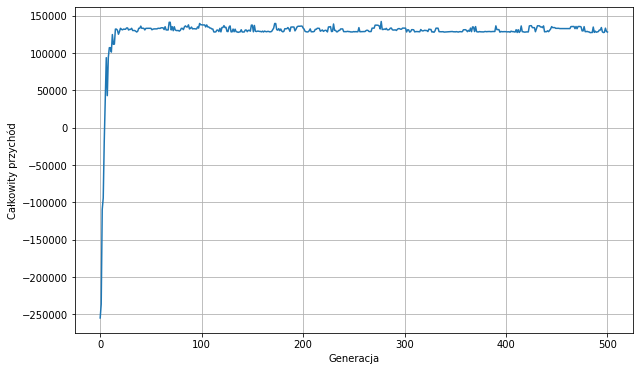

In [29]:
algorithm_settings = {
    'selection_method' : "tournament",
    'tournament_size' : 100,
    'crossover_methods' : ["one_point", "two_point"],
    'mutation_methods' : ["uniform", "swap", "event_change"],
    'population_size' : 1000,
    'generations' : 500,
    'parents_percent' : 30,
    'mutation_size' : 0.30,
}

best_solution, best_solutions_in_generations = genetic_algorithm(**algorithm_settings, **problem_settings)
plt.figure(figsize=(10, 6))
plt.plot(best_solutions_in_generations)
plt.grid()
plt.ylabel("Całkowity przychód")
plt.xlabel("Generacja")
plt.show()

In [30]:
print(f"Przychód z najlepszego rozwiązania: {best_solution.overall_profit()}")
print(f"\nNajlepsze rozwiązanie:")
for i, el in enumerate(best_solution.solution_list):
    print(f"{i + 1}. {el}")

Przychód z najlepszego rozwiązania: 142298.60655

Najlepsze rozwiązanie:
1. event_id = 15, city = Zielona Góra, stay_duration = 1, ingredients_bought = 3945
2. event_id = 1, city = Warszawa, stay_duration = 3, ingredients_bought = 20052
3. event_id = 12, city = Katowice, stay_duration = 5, ingredients_bought = 9945
4. event_id = 20, city = Rzeszów, stay_duration = 1, ingredients_bought = 150
